In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download vrajesh0sharma7/cat-vs-dog-classification

Dataset URL: https://www.kaggle.com/datasets/vrajesh0sharma7/cat-vs-dog-classification
License(s): CC0-1.0
cat-vs-dog-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [4]:
import zipfile
zep_ref = zipfile.ZipFile("/content/cat-vs-dog-classification.zip" , "r")
zep_ref.extractall("/content")
zep_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout
import matplotlib.pyplot as plt


In [6]:
##### generators are the keras function that allows the input in batches bcz there are alot of images cannot give at once , they divide data into batches
# generator for train data
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/train",
    labels ="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256) # givig the size bcz cnn model expect sama size of images
)


#### generator for validation data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/test",
    labels ="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256) # givig the size bcz cnn model expect sama size of images
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
print(train_ds.class_names)
len(train_ds)

['cats', 'dogs']


625

In [8]:
# normailize pixel values from 0 to 1
# as now ithey are ranging from 0 to 255

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [9]:
## create a cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())


model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(train_ds , epochs=10 , validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 90ms/step - accuracy: 0.5668 - loss: 2.4608 - val_accuracy: 0.6510 - val_loss: 0.6174
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6973 - loss: 0.5736 - val_accuracy: 0.5176 - val_loss: 1.0124
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7440 - loss: 0.5125 - val_accuracy: 0.7552 - val_loss: 0.4985
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7873 - loss: 0.4699 - val_accuracy: 0.7896 - val_loss: 0.4749
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8236 - loss: 0.3928 - val_accuracy: 0.7734 - val_loss: 0.4804
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.8672 - loss: 0.3140 - val_accuracy: 0.8108 - val_loss: 0.4467
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8930 - loss: 0.2476 - val_accuracy: 0.8052 - val_loss: 0.5242
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9320 - loss: 0.1670 - 

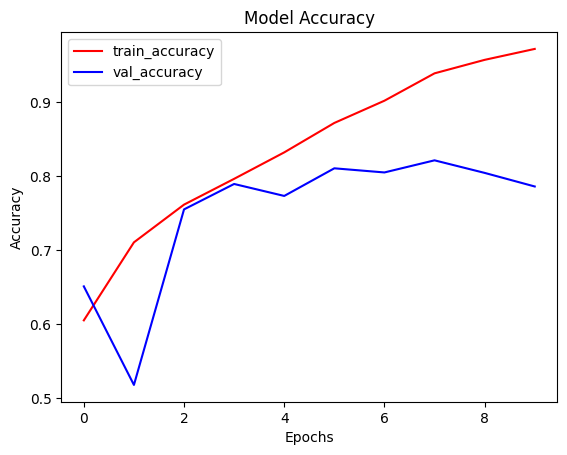

In [13]:
# Plot training accuracy
plt.plot(history.history["accuracy"], color='red', label='train_accuracy')

# Plot validation accuracy
plt.plot(history.history["val_accuracy"], color='blue', label='val_accuracy')

# Add title and labels
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


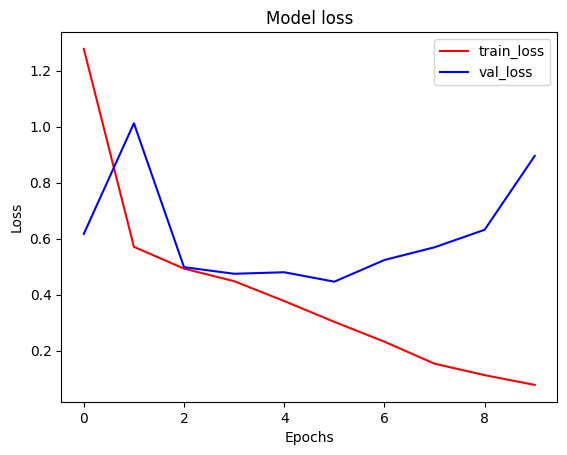

In [21]:
# Plot training accuracy
plt.plot(history.history["loss"], color='red', label='train_loss')

# Plot validation accuracy
plt.plot(history.history["val_loss"], color='blue', label='val_loss')

# Add title and labels
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [15]:
pip install opencv-python

In [22]:
import cv2
img = cv2.imread('/content/dog.jpeg')
    # cv2.IMREAD_COLOR (1): Loads a color image (default).
    # cv2.IMREAD_GRAYSCALE (0): Loads a grayscale image.
    # cv2.IMREAD_UNCHANGED (-1): Loads an image including alpha channel.

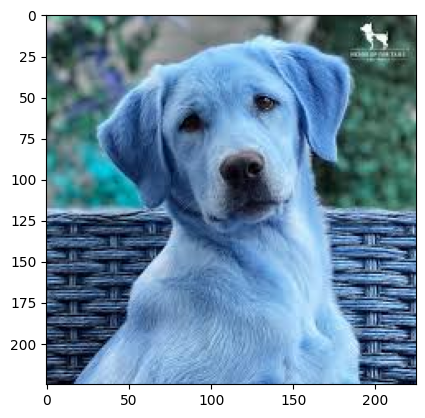

In [23]:
plt.imshow(img)

In [24]:
img = cv2.resize(img, (256,256))

In [25]:
test_input = img.reshape((1,256,256,3)) # bcz in our model we pass image in batches so here batch contain 1 image


In [26]:
pred = model.predict(test_input)
pred
# 0 for cat and 1 for dog


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

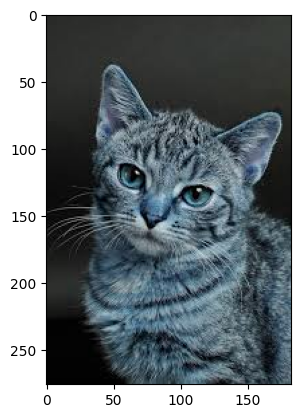

In [32]:
img2 = cv2.imread('/content/cat.jpeg')
plt.imshow(img2)


In [33]:
img2 = cv2.resize(img2, (256,256))
test_input_2 = img2.reshape((1,256,256,3))


In [34]:
model.predict(test_input_2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)